**Nama Anggota Kelompok:**
1. Desi Nofitasari (24083010058)
2. Diva Anggraeni (24083010065)
3. Siti Rania Azaria (24083010072)

**Kelas: Analisis Numerik (A)**

**JUDUL PROJECT:**
>**OPTIMASI STRATEGI DISKON DAN LABA PENJUALAN PRODUK SHOPEE BERDASARKAN HARGA DENGAN PERTIMBANGAN BIAYA ADMINISTRASI**

# **Preprocessing Data**

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_excel("/content/DataProdukShopee.xlsx")
df

,No. Pesanan,Nama Produk,Harga Awal,Total Diskon Toko,Harga Setelah Diskon,Jumlah,Total Harga Produk,Voucher Shopee,Total Pembayaran,Biaya Admin,Penghasilan Kotor,Penghasilan Bersih
0,250601CP49DS8P,Skintific set 4 Darkspot,497500,100,497500,1,497500,99480.0,398020.0,0.12,NaN,NaN
1,250601D1DD19W6,Skintific set 4 Barier,463000,100,463000,1,463000,92600.0,370400.0,0.12,NaN,NaN
2,250601D1DD19W6,Glad2glow Moisturizer Pomegrante,44000,7900,36200,1,36200,7240.0,28960.0,0.12,NaN,NaN
3,250601E0FW4J8E,Hanum Lip serum,99000,75249,23851,1,23851,0.0,23851.0,0.12,NaN,NaN
4,250601E4SYGNGN,Skintific set 4 Glowing,445000,0,445000,1,445000,89000.0,356000.0,0.12,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
150,250630VF047W0V,SKINTIFIC set 2 Retinol,345000,191000,249500,2,499000,99800.0,399200.0,0.12,NaN,NaN
151,250630VT0UXFVG,Azarine SS Cica,35000,8497,26553,1,26553,0.0,26553.0,0.12,NaN,NaN
152,250630VT4TRDTR,Skintific set 4 Darkspot,485000,16050,469000,1,469000,93800.0,375200.0,0.12,NaN,NaN
153,250630VT4TRDTR,Parfum Fresh,15000,13220,10610,3,31830,6366.0,25464.0,0.12,NaN,NaN


Dataset yang digunakan adalah dataset yang diekspor dari data penjualan shopee selama satu bulan. Dataset yang digunakan telah disortir berdasarkan entitas yang dibutuhkan untuk analisis. Berikut adalah penjelasan dari entitasnya:
1. No. Pesanan : berisi nomor pesanan unik dalam sekali transaksi selesai
2. Nama Produk : berisi informasi nama produk yang terjual dalam satu kali transaksi.
3. Harga Awal : berisi informasi harga awal produk terjual yang belum dikenakan diskon apapun.
4. Total Diskon Toko : berisi informasi diskon yang diberikan oleh toko dan biayanya ditanggung oleh toko sendiri.
5. Harga Setelah Diskon : berisi informasi harga produk setelah mendapatkan diskon toko dan belum termasuk diskon yang ditanggung oleh shopee.
6. Jumlah : berisi informasi total produk dibeli berdarkan satu jenis produk.
7. Total Harga Produk : berisi informasi total harga produk berasal dari Harga Setelah Diskon dikali dengan Jumlah.
8. Voucher Shopee : berisi informasi potongan harga yang ditanggung oleh shopee.
9. Total Pembayaran : berisi informasi total harga produk yang harus dibayarkan oleh pembeli yang sudah dipotong voucer shopee dan toko.
10. Biaya Admin : berisi informasi biaya admin yang ditanggung oleh penjual dalam bentuk persentase.

In [ ]:
#mengisi kolom penghasilan kotor dan penghasilan bersih
df['Penghasilan Kotor'] = df['Total Harga Produk']
df['Penghasilan Bersih'] = df['Total Harga Produk'] * (1 - df['Biaya Admin'])
df

,No. Pesanan,Nama Produk,Harga Awal,Total Diskon Toko,Harga Setelah Diskon,Jumlah,Total Harga Produk,Voucher Shopee,Total Pembayaran,Biaya Admin,Penghasilan Kotor,Penghasilan Bersih
0,250601CP49DS8P,Skintific set 4 Darkspot,497500,100,497500,1,497500,99480.0,398020.0,0.12,497500,437800.00
1,250601D1DD19W6,Skintific set 4 Barier,463000,100,463000,1,463000,92600.0,370400.0,0.12,463000,407440.00
2,250601D1DD19W6,Glad2glow Moisturizer Pomegrante,44000,7900,36200,1,36200,7240.0,28960.0,0.12,36200,31856.00
3,250601E0FW4J8E,Hanum Lip serum,99000,75249,23851,1,23851,0.0,23851.0,0.12,23851,20988.88
4,250601E4SYGNGN,Skintific set 4 Glowing,445000,0,445000,1,445000,89000.0,356000.0,0.12,445000,391600.00
...,...,...,...,...,...,...,...,...,...,...,...,...
150,250630VF047W0V,SKINTIFIC set 2 Retinol,345000,191000,249500,2,499000,99800.0,399200.0,0.12,499000,439120.00
151,250630VT0UXFVG,Azarine SS Cica,35000,8497,26553,1,26553,0.0,26553.0,0.12,26553,23366.64
152,250630VT4TRDTR,Skintific set 4 Darkspot,485000,16050,469000,1,469000,93800.0,375200.0,0.12,469000,412720.00
153,250630VT4TRDTR,Parfum Fresh,15000,13220,10610,3,31830,6366.0,25464.0,0.12,31830,28010.40


Mengisi kolom Penghasilan Kotor dari entitas Total Harga Produk dan kolom Penghasilan Bersih dari total harga produk dikurangi biaya admin.

In [ ]:
#menampilkan nama produk unik dan total transaksinya
df['Nama Produk'].value_counts()

,count
Nama Produk,
Hanum Lip serum,50
Marina Sunblock,15
Viva Blush On,15
Azarine SS Cica,10
Parfum Fresh,6
Skintific set 2 Darkspot,6
Skintific set 4 Glowing,6
Marina Spf 92ml,5
Hijab Motif,5


Hanum Lip Serum menjadi produk dengan jumlah transaksi terbanyak, yang mengindikasikan permintaan konsumen paling dominan selama periode analisis.

In [ ]:
#mengisi harga beli dari setiap produk
harga_beli = {
    "Hanum Lip serum": 15000,
    "Skintific set 4 Darkspot": 415000,
    "Skintific set 4 Barier": 385000,
    "Glad2glow Moisturizer Pomegrante": 28000,
    "Skintific set 4 Glowing": 370000,
    "Azarine SS Cica": 19000,
    "Toner Npure 150ml": 65000,
    "Marina Sunblock": 19000,
    "Parfum Fresh": 5500,
    "Skintific set 2 Darkspot": 190000,
    "Toner Npure 30ml": 16000,
    "Viva Blush On ": 3700,
    "Marina Spf 92ml": 6700,
    "Skintific set 4 Acne": 385000,
    "Hijab Motif": 100000,
    "SKINTIFIC Facewash": 115000,
    "Marina Ungu 185ml": 7200,
    "Blouse rempel": 100000,
    "SOMETHINC Homan cushion": 165000,
    "SKINTIFIC set 2 Retinol": 205000,
    "Marina Sunblock 170ml": 42000,
    "VIVA milk cleanser": 3999,
    "OMG miccelar ": 8700,
    "MAANGE Puff": 4100
}
df['Harga Beli'] = df['Nama Produk'].map(harga_beli)
df

,No. Pesanan,Nama Produk,Harga Awal,Total Diskon Toko,Harga Setelah Diskon,Jumlah,Total Harga Produk,Voucher Shopee,Total Pembayaran,Biaya Admin,Penghasilan Kotor,Penghasilan Bersih,Harga Beli
0,250601CP49DS8P,Skintific set 4 Darkspot,497500,100,497500,1,497500,99480.0,398020.0,0.12,497500,437800.00,415000.0
1,250601D1DD19W6,Skintific set 4 Barier,463000,100,463000,1,463000,92600.0,370400.0,0.12,463000,407440.00,385000.0
2,250601D1DD19W6,Glad2glow Moisturizer Pomegrante,44000,7900,36200,1,36200,7240.0,28960.0,0.12,36200,31856.00,28000.0
3,250601E0FW4J8E,Hanum Lip serum,99000,75249,23851,1,23851,0.0,23851.0,0.12,23851,20988.88,15000.0
4,250601E4SYGNGN,Skintific set 4 Glowing,445000,0,445000,1,445000,89000.0,356000.0,0.12,445000,391600.00,370000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,250630VF047W0V,SKINTIFIC set 2 Retinol,345000,191000,249500,2,499000,99800.0,399200.0,0.12,499000,439120.00,205000.0
151,250630VT0UXFVG,Azarine SS Cica,35000,8497,26553,1,26553,0.0,26553.0,0.12,26553,23366.64,19000.0
152,250630VT4TRDTR,Skintific set 4 Darkspot,485000,16050,469000,1,469000,93800.0,375200.0,0.12,469000,412720.00,415000.0
153,250630VT4TRDTR,Parfum Fresh,15000,13220,10610,3,31830,6366.0,25464.0,0.12,31830,28010.40,5500.0


In [ ]:
#Menghitung keuntungan dari penghasilan kotor dikurangi penghasilan bersih
df['Keuntungan'] = df['Penghasilan Kotor'] - df['Penghasilan Bersih']
df

,No. Pesanan,Nama Produk,Harga Awal,Total Diskon Toko,Harga Setelah Diskon,Jumlah,Total Harga Produk,Voucher Shopee,Total Pembayaran,Biaya Admin,Penghasilan Kotor,Penghasilan Bersih,Harga Beli,Keuntungan
0,250601CP49DS8P,Skintific set 4 Darkspot,497500,100,497500,1,497500,99480.0,398020.0,0.12,497500,437800.00,415000.0,59700.00
1,250601D1DD19W6,Skintific set 4 Barier,463000,100,463000,1,463000,92600.0,370400.0,0.12,463000,407440.00,385000.0,55560.00
2,250601D1DD19W6,Glad2glow Moisturizer Pomegrante,44000,7900,36200,1,36200,7240.0,28960.0,0.12,36200,31856.00,28000.0,4344.00
3,250601E0FW4J8E,Hanum Lip serum,99000,75249,23851,1,23851,0.0,23851.0,0.12,23851,20988.88,15000.0,2862.12
4,250601E4SYGNGN,Skintific set 4 Glowing,445000,0,445000,1,445000,89000.0,356000.0,0.12,445000,391600.00,370000.0,53400.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,250630VF047W0V,SKINTIFIC set 2 Retinol,345000,191000,249500,2,499000,99800.0,399200.0,0.12,499000,439120.00,205000.0,59880.00
151,250630VT0UXFVG,Azarine SS Cica,35000,8497,26553,1,26553,0.0,26553.0,0.12,26553,23366.64,19000.0,3186.36
152,250630VT4TRDTR,Skintific set 4 Darkspot,485000,16050,469000,1,469000,93800.0,375200.0,0.12,469000,412720.00,415000.0,56280.00
153,250630VT4TRDTR,Parfum Fresh,15000,13220,10610,3,31830,6366.0,25464.0,0.12,31830,28010.40,5500.0,3819.60


Pada tahap ini ditambahkan kolom Keuntungan, yang merepresentasikan besarnya potongan pendapatan akibat biaya administrasi, yaitu selisih antara penghasilan kotor dan penghasilan bersih

In [ ]:
df['Diskon Toko (%)'] = (
    (df['Harga Awal'] - df['Harga Setelah Diskon'])
    / df['Harga Awal']
) * 100

Pada tahap ini dihitung persentase diskon yang berasal langsung dari toko dengan membandingkan selisih antara harga awal dan harga setelah diskon terhadap harga awal produk. Nilai ini menggambarkan besarnya potongan harga yang ditanggung sepenuhnya oleh penjual. Dalam konteks bisnis, diskon toko memiliki dampak langsung terhadap margin keuntungan karena menurunkan harga jual tanpa adanya subsidi dari pihak eksternal.

In [ ]:
df['Diskon Shopee (%)'] = (
    df['Voucher Shopee'] / df['Total Harga Produk']
) * 100

Bagian ini menghitung persentase diskon yang berasal dari voucher Shopee dengan membandingkan nilai voucher terhadap total harga produk. Diskon ini merepresentasikan potongan harga yang diberikan oleh platform, bukan oleh toko secara langsung. Secara bisnis, diskon dari platform sering digunakan untuk meningkatkan daya tarik harga di mata konsumen tanpa mengurangi margin penjual.

In [ ]:
df['Total Diskon (%)'] = (
    (df['Total Diskon Toko'] + df['Voucher Shopee'])
    / (df['Harga Awal'] * df['Jumlah'])
) * 100

Pada sel ini, total diskon dihitung dengan menggabungkan diskon toko dan voucher Shopee, kemudian dibandingkan dengan total nilai transaksi sebelum diskon (harga awal dikalikan jumlah pembelian). Nilai total diskon ini mencerminkan diskon riil yang dirasakan konsumen. Dalam analisis bisnis, metrik ini penting karena memengaruhi persepsi harga, keputusan pembelian, serta evaluasi efektivitas strategi promosi secara keseluruhan.

In [ ]:
import pandas as pd
import numpy as np

# Buat interval persen diskon
bins = np.arange(0, 110, 10)  # 0-10, 10-20, ..., 100
labels = [f"{i}-{i+10}%" for i in bins[:-1]]

df['Kelompok Diskon'] = pd.cut(
    df['Total Diskon (%)'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

Tahap ini digunakan untuk mengelompokkan persentase total diskon ke dalam interval tertentu, seperti 0–10%, 10–20%, hingga 90–100%. Pengelompokan ini bertujuan untuk memudahkan analisis pola penjualan, keuntungan, dan margin pada setiap tingkat diskon. Dalam kerangka Business Intelligence, langkah ini berfungsi sebagai dasar analisis komparatif dan pendukung pengambilan keputusan strategis terkait penetapan harga dan kebijakan diskon.

In [ ]:
diskon_keuntungan = (
    df.groupby('Kelompok Diskon')['Keuntungan']
    .mean()
    .reset_index()
)

/tmp/ipython-input-2979570183.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Kelompok Diskon')['Keuntungan']


Kode tersebut digunakan untuk menghitung rata-rata keuntungan pada setiap kelompok diskon dengan cara mengelompokkan data berdasarkan interval diskon, lalu mengambil nilai mean keuntungan. Hasilnya membantu analisis bisnis untuk menilai tingkat diskon mana yang masih menghasilkan profit optimal dan mana yang berpotensi merugikan, sehingga strategi diskon dapat ditentukan secara lebih tepat berbasis data.

# **Business Analysis**

**Analisis Pengaruh Persentase Diskon terhadap Penjualan dan Keuntungan secara Kumulatif**

/tmp/ipython-input-1023830243.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Kelompok Diskon')


Diskon optimal berdasarkan produk terjual : 20-30%
Diskon optimal berdasarkan keuntungan     : 20-30%


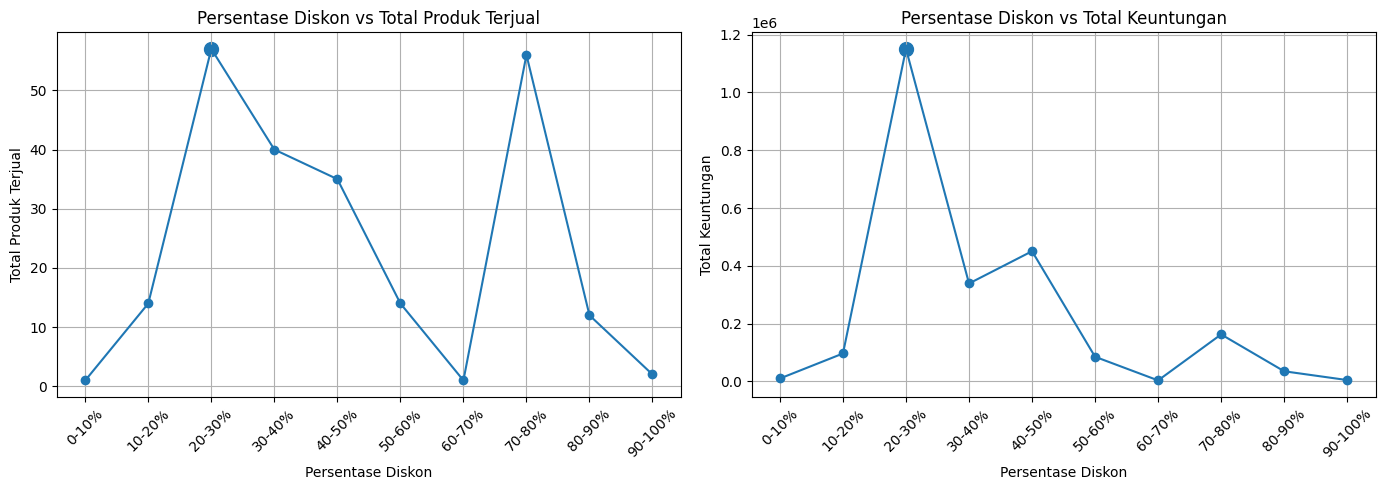

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. BINNING DISKON
bins = np.arange(0, 110, 10)
labels = [f"{i}-{i+10}%" for i in bins[:-1]]

df['Kelompok Diskon'] = pd.cut(
    df['Total Diskon (%)'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# 2. AGREGASI NUMERIK
diskon_summary = (
    df.groupby('Kelompok Diskon')
    .agg({
        'Jumlah': 'sum',
        'Keuntungan': 'sum'
    })
    .reset_index()
)

# 3. OPTIMASI NUMERIK EKSPLISIT (TANPA ARGMAX)
# berdasarkan produk terjual
diskon_optimal_volume = None
jumlah_maks = -np.inf

# berdasarkan keuntungan
diskon_optimal_profit = None
profit_maks = -np.inf

for i in range(len(diskon_summary)):
    jumlah = diskon_summary.loc[i, 'Jumlah']
    profit = diskon_summary.loc[i, 'Keuntungan']
    diskon = diskon_summary.loc[i, 'Kelompok Diskon']

    if jumlah > jumlah_maks:
        jumlah_maks = jumlah
        diskon_optimal_volume = diskon

    if profit > profit_maks:
        profit_maks = profit
        diskon_optimal_profit = diskon

print("Diskon optimal berdasarkan produk terjual :", diskon_optimal_volume)
print("Diskon optimal berdasarkan keuntungan     :", diskon_optimal_profit)

# 4. VISUALISASI
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Grafik 1: Diskon vs Produk Terjual
ax[0].plot(
    diskon_summary['Kelompok Diskon'],
    diskon_summary['Jumlah'],
    marker='o'
)
ax[0].scatter(
    diskon_optimal_volume,
    jumlah_maks,
    s=100
)
ax[0].set_title('Persentase Diskon vs Total Produk Terjual')
ax[0].set_xlabel('Persentase Diskon')
ax[0].set_ylabel('Total Produk Terjual')
ax[0].tick_params(axis='x', rotation=45)
ax[0].grid(True)

# Grafik 2: Diskon vs Keuntungan
ax[1].plot(
    diskon_summary['Kelompok Diskon'],
    diskon_summary['Keuntungan'],
    marker='o'
)
ax[1].scatter(
    diskon_optimal_profit,
    profit_maks,
    s=100
)
ax[1].set_title('Persentase Diskon vs Total Keuntungan')
ax[1].set_xlabel('Persentase Diskon')
ax[1].set_ylabel('Total Keuntungan')
ax[1].tick_params(axis='x', rotation=45)
ax[1].grid(True)

plt.tight_layout()
plt.show()

Analisis ini menggunakan pendekatan optimasi berbasis komputasi dalam kerangka Business Intelligence untuk menentukan tingkat diskon yang optimal untuk kasus nyata pada aktivitas bisnis e-commerce. Dengan memaksimalkan fungsi objektif berupa jumlah produk terjual dan keuntungan, sistem ini mengevaluasi efektivitas berbagai tingkat diskon secara kuantitatif. Hasil menunjukkan secara kumulatif tingkat diskon 20–30% merupakan kinerja terbaik pada data yang dianalisis, baik dari sisi jumlah produk terjual maupun keuntungan. Temuan ini mengindikasikan bahwa diskon pada rentang tersebut relatif lebih efektif dibandingkan tingkat diskon lainnya. Namun, hasil ini bersifat kontekstual terhadap data historis yang digunakan dan dapat berubah sesuai dengan karakteristik produk, perilaku konsumen, serta kondisi pasar.

**Analisi Keuntungan per Produk terhadap Persentase Diskon**

/tmp/ipython-input-1916239091.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Nama Produk', 'Kelompok Diskon'])['Keuntungan']


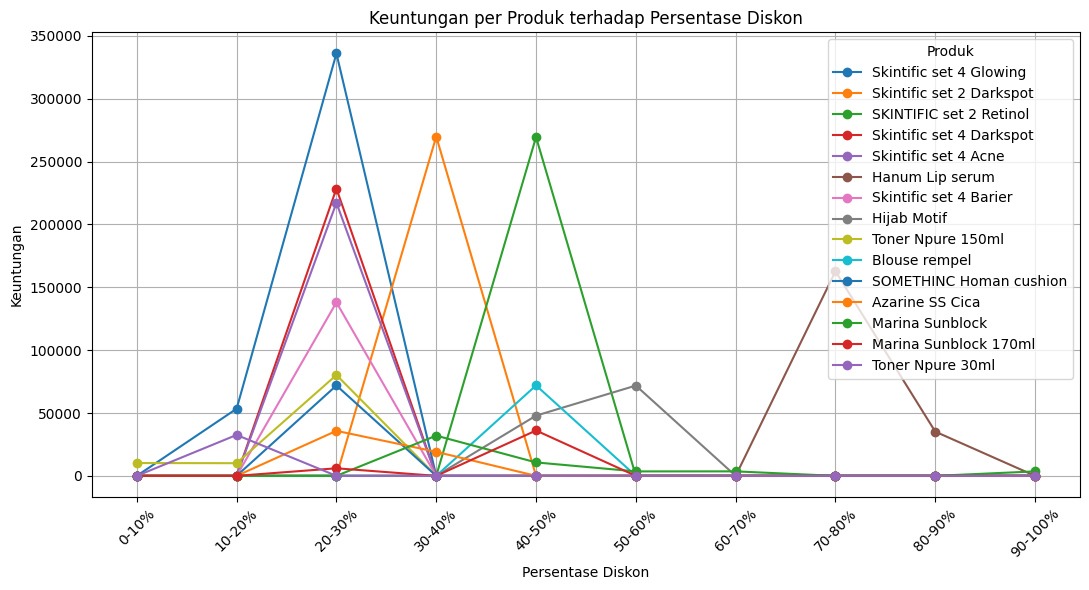

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Binning persentase diskon
bins = np.arange(0, 110, 10)  # 0–10, 10–20, ...
labels = [f"{i}-{i+10}%" for i in bins[:-1]]

df['Kelompok Diskon'] = pd.cut(
    df['Total Diskon (%)'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# 2. Hitung keuntungan PER PRODUK & PER DISKON
df_produk = (
    df.groupby(['Nama Produk', 'Kelompok Diskon'])['Keuntungan']
    .sum()     # ganti sum() kalau mau total
    .reset_index()
)

# 3. Ambil top produk (biar grafik kebaca)
top_produk = (
    df.groupby('Nama Produk')['Keuntungan']
    .sum()
    .sort_values(ascending=False)
    .head(15)
    .index
)

# 4. Visualisasi (SATU GRAFIK)
plt.figure(figsize=(11, 6))

for produk in top_produk:
    subset = df_produk[df_produk['Nama Produk'] == produk]
    plt.plot(
        subset['Kelompok Diskon'],
        subset['Keuntungan'],
        marker='o',
        label=produk
    )

plt.xlabel('Persentase Diskon')
plt.ylabel('Keuntungan')
plt.title('Keuntungan per Produk terhadap Persentase Diskon')
plt.xticks(rotation=45)
plt.legend(title='Produk')
plt.grid(True)
plt.tight_layout()
plt.show()

Grafik menunjukkan bahwa tingkat diskon memengaruhi keuntungan secara berbeda pada setiap produk, sehingga strategi diskon tidak dapat disamaratakan. Sebagian besar produk menghasilkan keuntungan tertinggi pada diskon menengah, terutama pada rentang 20–30% hingga 40–50%, di mana peningkatan volume penjualan masih mampu menutup penurunan margin. Sebaliknya, diskon tinggi cenderung menurunkan keuntungan karena margin yang semakin kecil, meskipun minat beli meningkat.

Dalam konteks Business Intelligence, analisis ini berfungsi sebagai alat pendukung keputusan untuk menentukan strategi diskon yang lebih efektif dan berbasis data. Temuan ini mengindikasikan bahwa diskon menengah relatif lebih aman untuk menjaga profitabilitas, sementara diskon tinggi sebaiknya diterapkan secara selektif sesuai karakteristik produk dan tujuan bisnis, seperti promosi terbatas atau clearance stok.

**Analisi Jumlah Produk Terjual per Produk terhadap Persentase Diskon**

/tmp/ipython-input-2549840225.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Nama Produk', 'Kelompok Diskon'])['Jumlah']


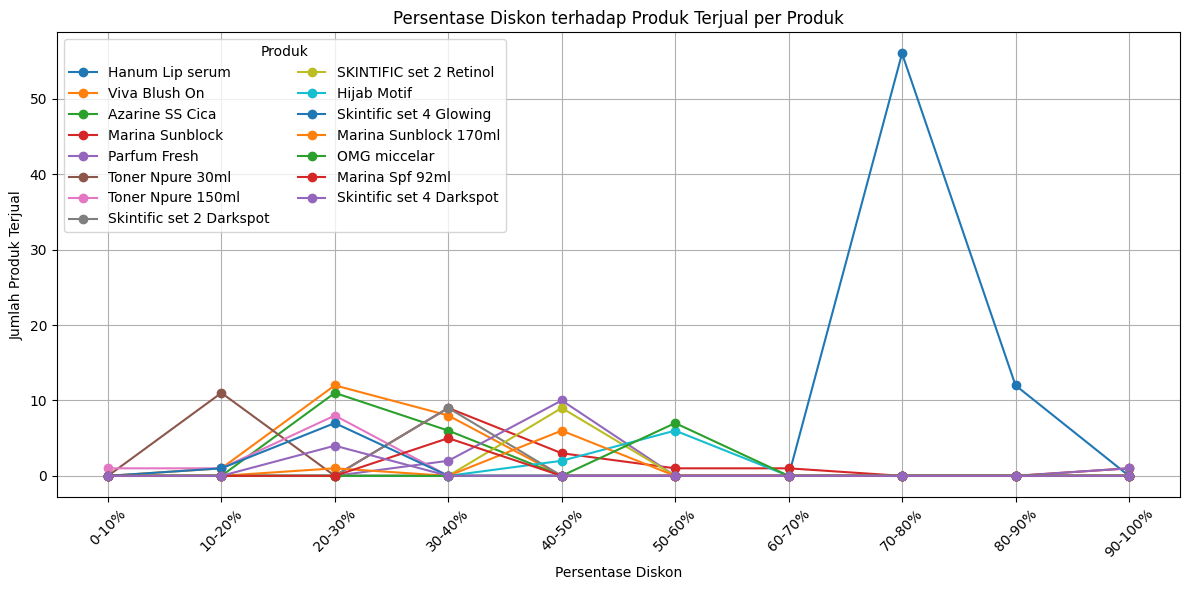

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Binning persentase diskon
bins = np.arange(0, 110, 10)
labels = [f"{i}-{i+10}%" for i in bins[:-1]]

df['Kelompok Diskon'] = pd.cut(
    df['Total Diskon (%)'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# 2. Hitung PRODUK TERJUAL per PRODUK & per DISKON
df_produk = (
    df.groupby(['Nama Produk', 'Kelompok Diskon'])['Jumlah']
    .sum()      # total unit terjual
    .reset_index()
)

# 3. Ambil top produk (berdasarkan total terjual)
top_produk = (
    df.groupby('Nama Produk')['Jumlah']
    .sum()
    .sort_values(ascending=False)
    .head(15)
    .index
)

# 4. Visualisasi (SATU GRAFIK)
plt.figure(figsize=(12, 6))

for produk in top_produk:
    subset = df_produk[df_produk['Nama Produk'] == produk]
    plt.plot(
        subset['Kelompok Diskon'],
        subset['Jumlah'],
        marker='o',
        label=produk
    )

plt.xlabel('Persentase Diskon')
plt.ylabel('Jumlah Produk Terjual')
plt.title('Persentase Diskon terhadap Produk Terjual per Produk')
plt.xticks(rotation=45)
plt.legend(title='Produk', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

Grafik jumlah produk terjual per produk menunjukkan bahwa kenaikan penjualan paling konsisten terjadi pada diskon menengah, khususnya pada rentang 20–30% hingga 40–50%, meskipun respons setiap produk berbeda. Beberapa produk mengalami lonjakan penjualan pada diskon tertentu, sementara produk lain relatif stabil atau hanya meningkat pada satu rentang diskon saja. Hal ini menegaskan bahwa efektivitas diskon sangat dipengaruhi oleh karakteristik produk dan sensitivitas harga konsumen, sehingga tidak semua produk merespon diskon dengan pola yang sama.

Jika dikaitkan dengan analisis sebelumnya mengenai keuntungan, peningkatan jumlah produk terjual pada diskon menengah sejalan dengan temuan bahwa rentang diskon tersebut juga relatif lebih menguntungkan. Diskon tinggi memang dapat mendorong penjualan pada produk tertentu, namun tidak selalu berdampak positif terhadap profit. Dalam konteks Business Intelligence, kombinasi analisis volume penjualan dan keuntungan ini memberikan dasar yang lebih kuat bagi manajemen untuk menetapkan strategi diskon yang selektif, berorientasi pada data, dan disesuaikan dengan tujuan bisnis, bukan sekadar meningkatkan penjualan jangka pendek.

**Heatmap Total Profit dan Weighted Margin terhadap Harga dan Diskon**

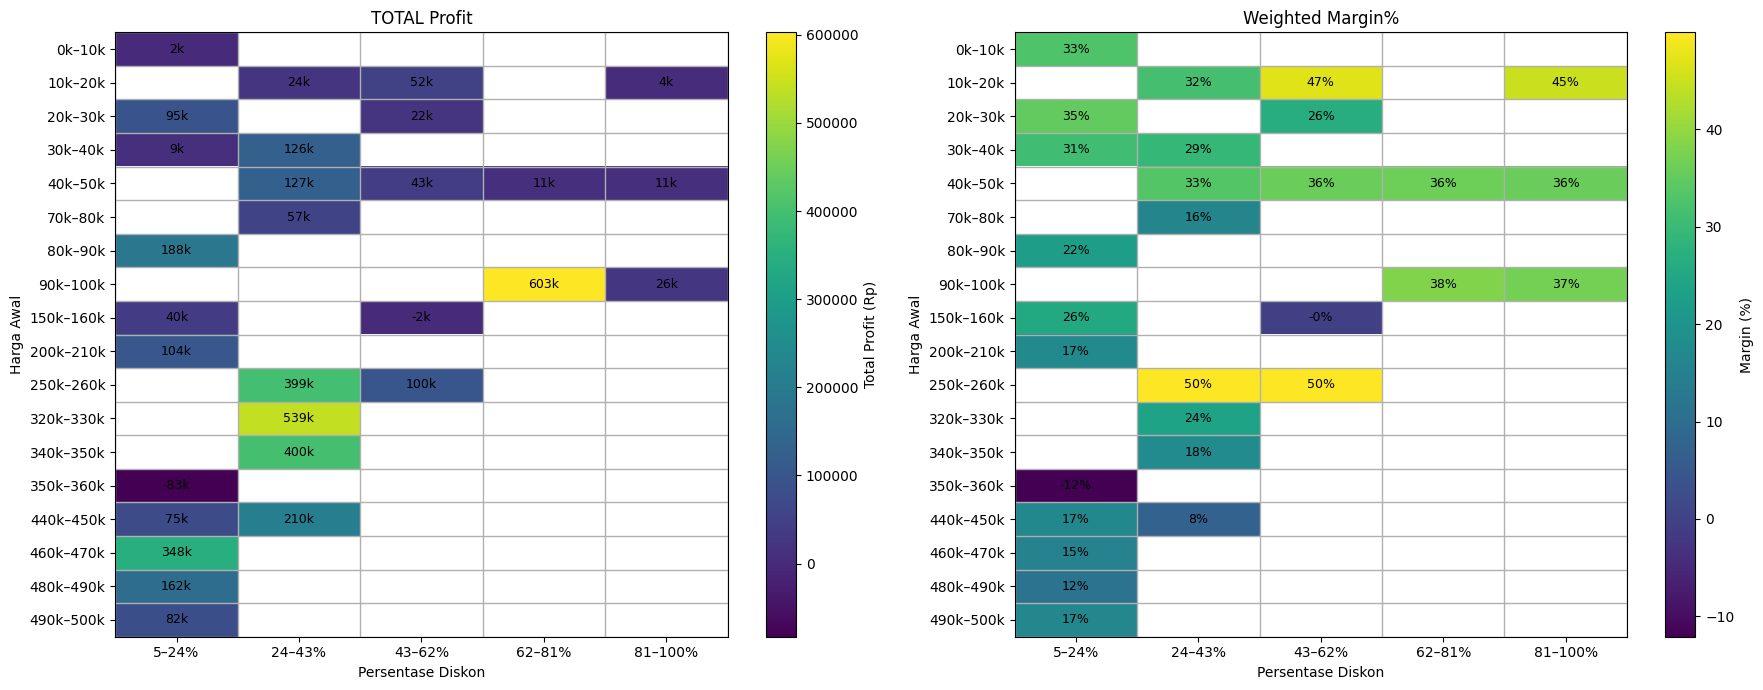

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 0) SET NAMA KOLOM (SESUAIKAN)
K_HARGA_AWAL = 'Harga Awal'
K_DISKON = 'Total Diskon (%)'
K_QTY = 'Jumlah'
K_HARGA_BELI = 'Harga Beli'
K_HARGA_SETELAH = 'Harga Setelah Diskon'  # PAKAI KOLOM KAMU, TIDAK BUAT BARU

# 1) CLEAN & HITUNG METRIK STRATEGI
for c in [K_HARGA_AWAL, K_DISKON, K_QTY, K_HARGA_BELI, K_HARGA_SETELAH]:
    df[c] = pd.to_numeric(df[c], errors='coerce')

df = df.dropna(subset=[K_HARGA_AWAL, K_DISKON, K_QTY, K_HARGA_BELI, K_HARGA_SETELAH]).copy()
df = df[df[K_QTY] > 0].copy()

# Profit per unit (Rp) dari kolom kamu
df['Profit_Unit'] = df[K_HARGA_SETELAH] - df[K_HARGA_BELI]

# Total (weighted by qty)
df['Total_Profit'] = df['Profit_Unit'] * df[K_QTY]
df['Revenue'] = df[K_HARGA_SETELAH] * df[K_QTY]

# Margin % (profit per unit / harga jual setelah diskon)
df['Margin_Pct'] = np.where(df[K_HARGA_SETELAH] > 0,
                            df['Profit_Unit'] / df[K_HARGA_SETELAH] * 100,
                            np.nan)

# 2) TANPA FILTER MARGIN
df_valid = df.copy()

# 3) BINNING (RANGE HARGA KAYAK CONTOH)
bins_harga = np.arange(0, 500_000 + 10_000, 10_000)

idx = pd.cut(df_valid[K_HARGA_AWAL], bins=bins_harga, include_lowest=True, right=False)
col = pd.cut(df_valid[K_DISKON], bins=5)

# 4) PIVOT UNTUK HEATMAP
P = pd.pivot_table(df_valid, values='Total_Profit', index=idx, columns=col, aggfunc='sum', observed=True)
R = pd.pivot_table(df_valid, values='Revenue',      index=idx, columns=col, aggfunc='sum', observed=True)

pivot_profit = P.dropna(how='all', axis=0).dropna(how='all', axis=1)
pivot_margin_weighted = ((P / R) * 100).reindex(index=pivot_profit.index, columns=pivot_profit.columns)

# 5) HELPER LABEL & PLOT
def label_harga(intervals):
    return [f"{int(i.left)//1000}k–{int(i.right)//1000}k" for i in intervals]

def label_diskon(intervals):
    return [f"{i.left:.0f}–{i.right:.0f}%" for i in intervals]

def draw_heatmap(ax, pivot, title, cbar_label, fmt_func):
    data = pivot.values
    masked = np.ma.masked_invalid(data)

    im = ax.imshow(masked, aspect='auto')
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label(cbar_label)

    ax.set_xticks(np.arange(pivot.shape[1]))
    ax.set_yticks(np.arange(pivot.shape[0]))
    ax.set_xticklabels(label_diskon(pivot.columns), rotation=0)
    ax.set_yticklabels(label_harga(pivot.index))

    ax.set_xlabel('Persentase Diskon')
    ax.set_ylabel('Harga Awal')
    ax.set_title(title)

    ax.set_xticks(np.arange(-0.5, pivot.shape[1], 1), minor=True)
    ax.set_yticks(np.arange(-0.5, pivot.shape[0], 1), minor=True)
    ax.grid(which='minor', linestyle='-', linewidth=1)
    ax.tick_params(which='minor', bottom=False, left=False)

    for i in range(pivot.shape[0]):
        for j in range(pivot.shape[1]):
            val = data[i, j]
            if np.isfinite(val):
                ax.text(j, i, fmt_func(val), ha='center', va='center', fontsize=9)

def fmt_profit(x):
    x = float(x)
    if abs(x) >= 1_000_000:
        return f"{x/1_000_000:.1f}M"
    if abs(x) >= 1_000:
        return f"{x/1_000:.0f}k"
    return f"{x:.0f}"

def fmt_margin(x):
    return f"{x:.0f}%"

# 6) PLOT 2 HEATMAP
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

draw_heatmap(axes[0], pivot_profit, "TOTAL Profit", "Total Profit (Rp)", fmt_profit)
draw_heatmap(axes[1], pivot_margin_weighted, "Weighted Margin%", "Margin (%)", fmt_margin)

plt.tight_layout()
plt.show()

Berdasarkan rangkaian analisis jumlah produk terjual, keuntungan, dan margin, terlihat bahwa efektivitas diskon tidak hanya ditentukan oleh besarnya persentase diskon, tetapi juga oleh karakteristik produk dan struktur harga awal. Analisis penjualan menunjukkan bahwa diskon menengah cenderung meningkatkan volume penjualan pada banyak produk, namun analisis keuntungan dan margin memperlihatkan bahwa diskon yang terlalu tinggi tidak selalu menghasilkan profit yang lebih besar. Hal ini mengindikasikan adanya trade-off antara peningkatan penjualan dan penurunan margin dalam strategi promosi.

Temuan ini juga mengindikasikan bahwa permainan harga (price framing) dapat memengaruhi hasil analisis diskon dan margin. Karena margin dihitung berdasarkan selisih harga jual dan harga beli, kenaikan harga awal produk dapat membuat diskon besar terlihat menarik secara persepsi, padahal secara nominal margin masih tetap terjaga. Praktik ini umum terjadi di dunia ritel dan e-commerce, di mana diskon besar digunakan sebagai alat pemasaran, sementara struktur harga sudah disesuaikan agar profitabilitas tetap terkontrol.

Dalam konteks Business Intelligence, hal ini menegaskan pentingnya menganalisis diskon bersamaan dengan harga awal dan margin, bukan secara terpisah. Diskon tinggi tidak selalu berarti strategi merugi jika diimbangi dengan penyesuaian harga dasar, namun tetap berisiko jika tidak berbasis data. Oleh karena itu, BI berperan sebagai alat pendukung keputusan untuk memastikan bahwa strategi diskon, penetapan harga, dan margin berjalan selaras serta berorientasi pada keberlanjutan profit jangka panjang, bukan sekadar pada persepsi diskon di sisi konsumen.